In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: <object object at 0x7f2a3cdbb650>


In [4]:
df=pd.read_csv("/content/TSLA (1).CSV")

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [6]:
stock_data=df[['Date', 'Close']]

In [7]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [9]:
stock_data['Date']=pd.to_datetime(stock_data.Date)

<ipython-input-9-26926e65b220>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date']=pd.to_datetime(stock_data.Date)


In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [11]:
stock_data=stock_data.set_index('Date')

In [12]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


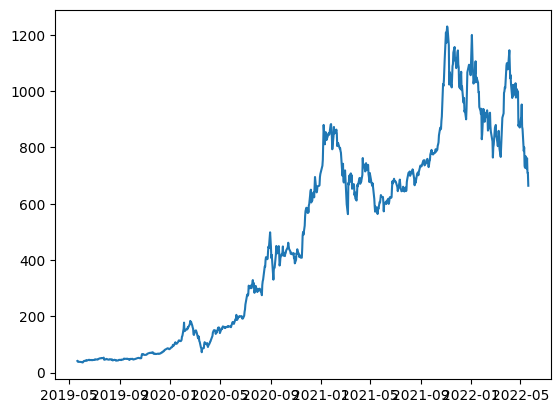

In [13]:
plt.plot(stock_data.Close)

<ipython-input-14-46a4cb4fe73c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data.Close)


<Axes: xlabel='Close', ylabel='Density'>

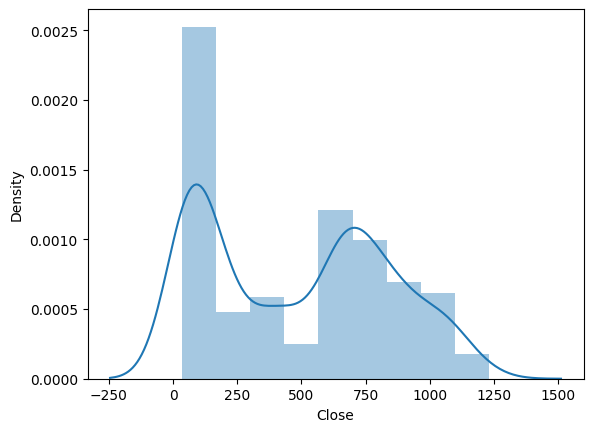

In [14]:
import seaborn as sns
sns.distplot(stock_data.Close)

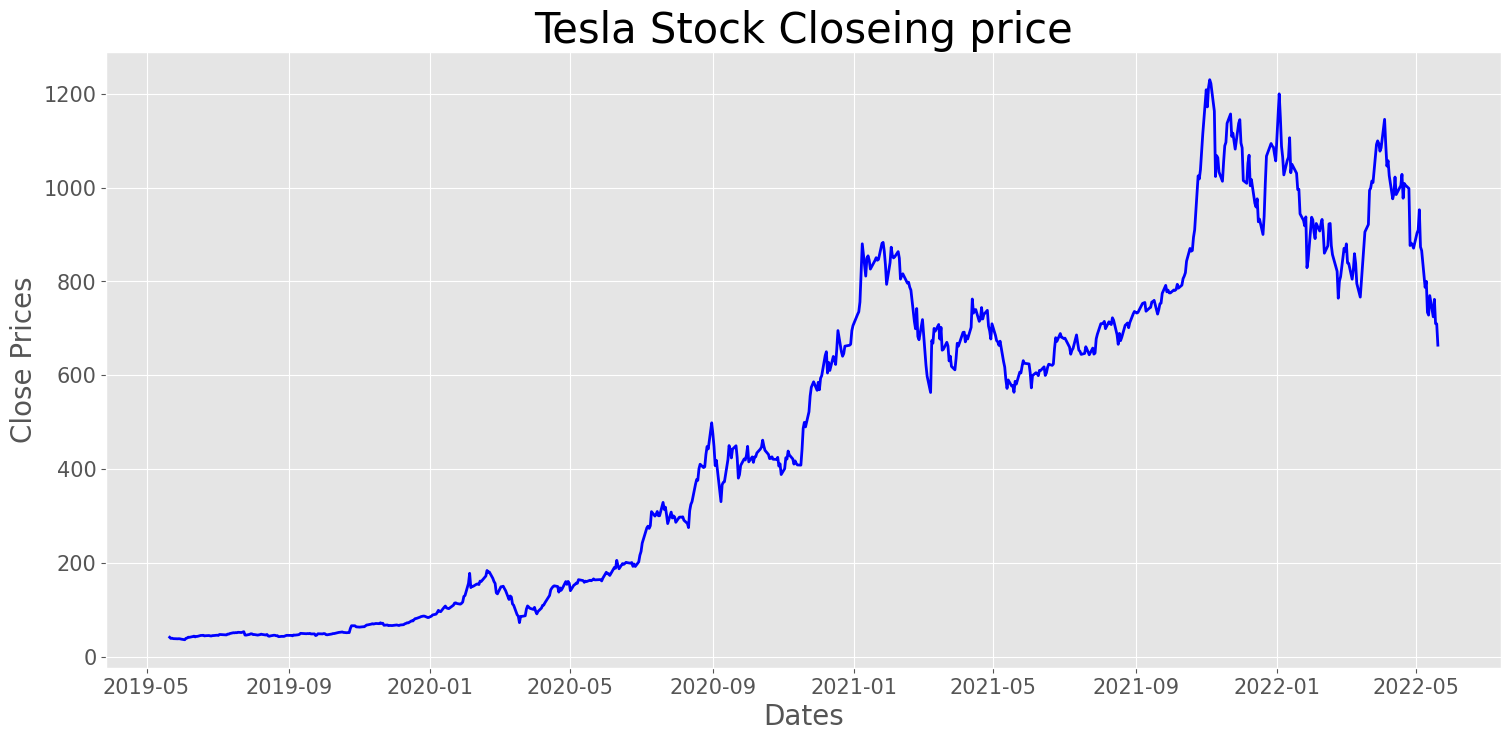

In [15]:
## Plotting close Price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices', fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'], linewidth=2, color='blue')
plt.title('Tesla Stock Closeing price', fontsize=30)
plt.show()

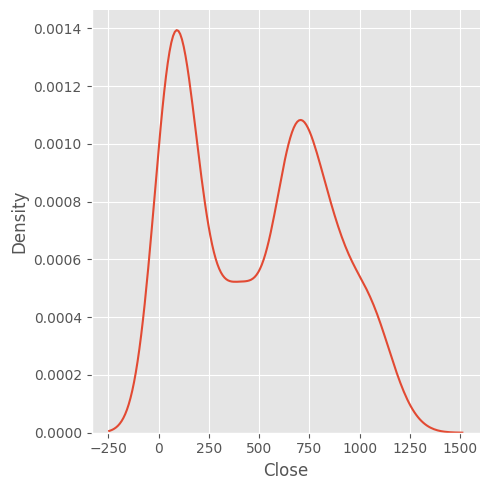

In [16]:
# plt.figure(figsize=(10,8))
sns.displot(stock_data['Close'], kind='kde')
# plt.xticks(fontsize=15)
plt.grid(True)
# plt.yticks(fontsize=15)
plt.show()

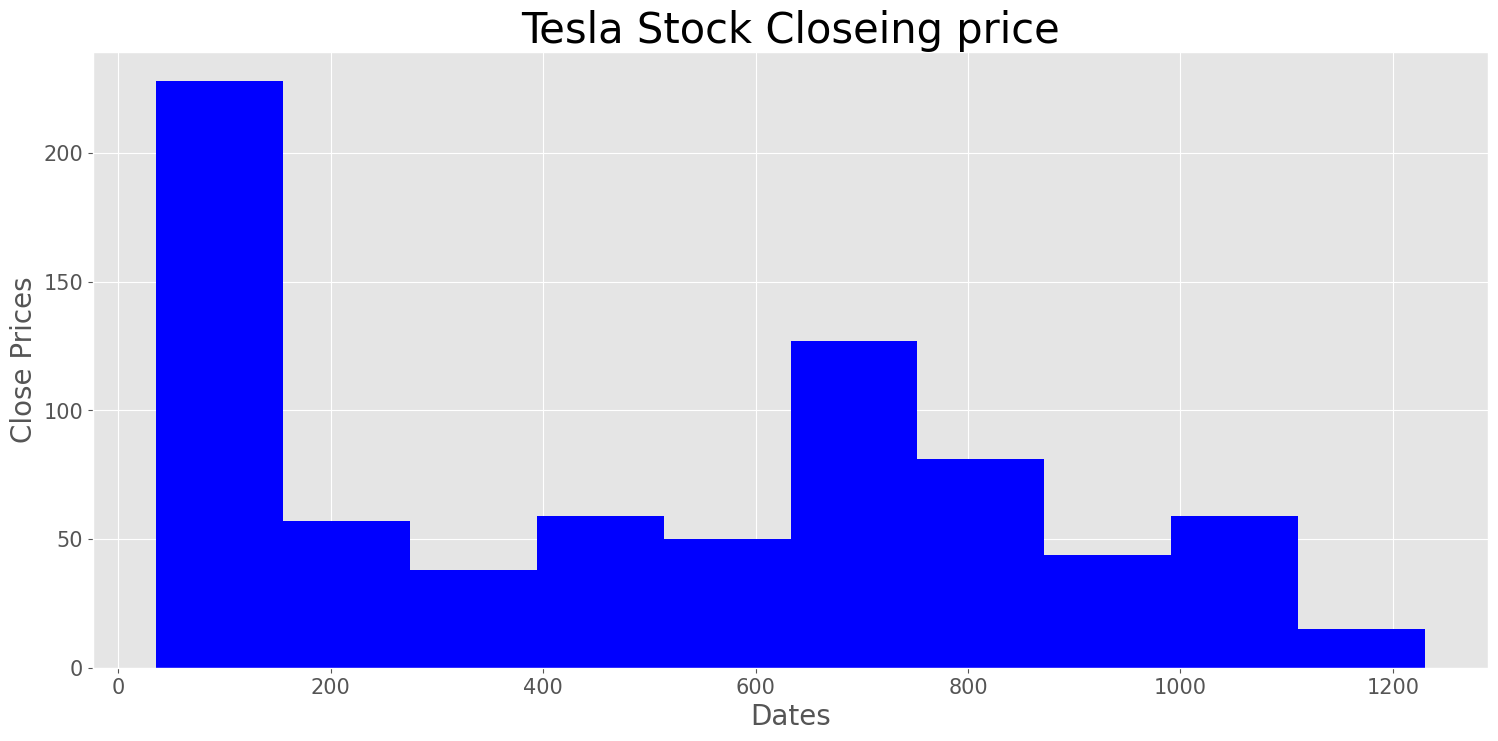

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices', fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data['Close'], linewidth=2, color='blue')
plt.title('Tesla Stock Closeing price', fontsize=30)
plt.show()

In [18]:
## Moving Average
stock_data['Close'].rolling(5).mean()

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28     38.905200
                 ...    
2022-05-16    751.200000
2022-05-17    743.514001
2022-05-18    738.676001
2022-05-19    734.959998
2022-05-20    713.821997
Name: Close, Length: 758, dtype: float64

In [19]:
rolling_mean=stock_data['Close'].rolling(5).mean()

In [20]:
rolling_std=stock_data['Close'].rolling(5).std()

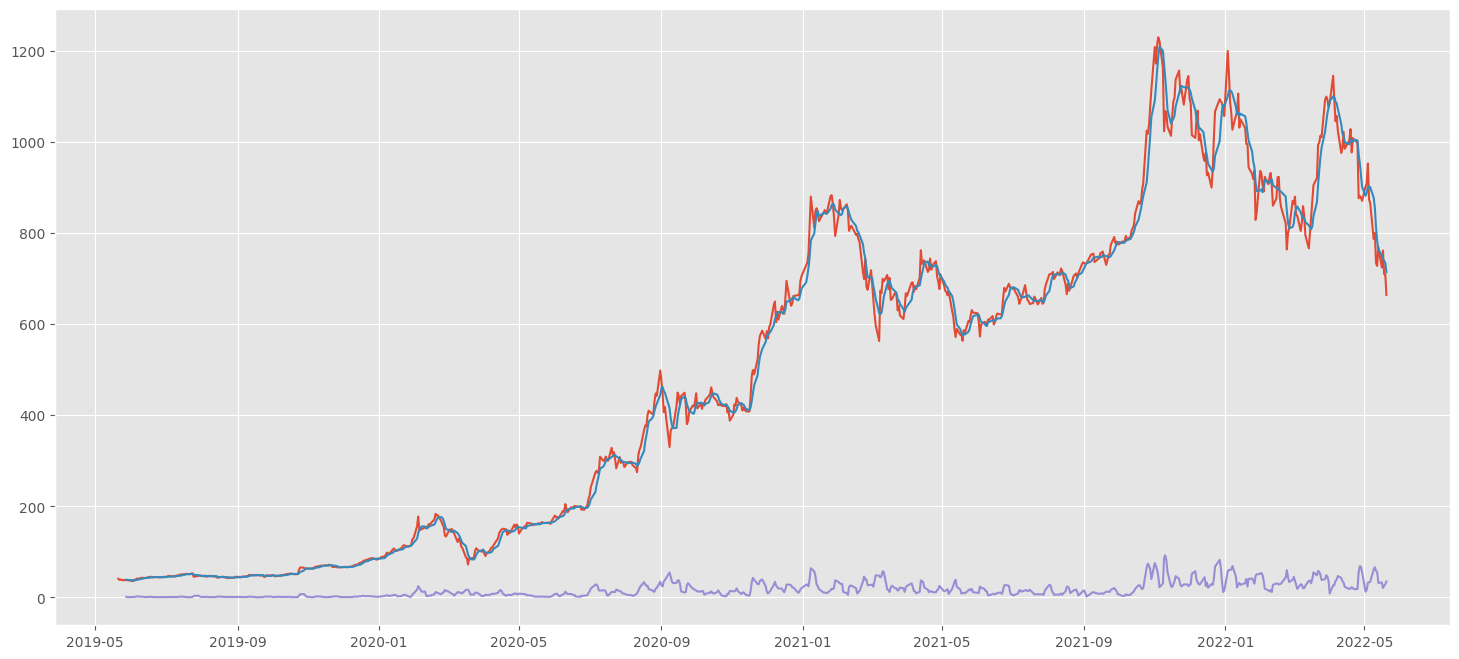

In [21]:
plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(rolling_mean)
plt.plot(rolling_std)

In [22]:
from statsmodels.tsa.stattools import adfuller

In [32]:
adf=adfuller(stock_data.Close)

In [33]:

adf

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [26]:
pd.Series(adf[:4], index=['test stats', 'P_value', 'lag_value', 'Data_point'])

test stats     -1.363009
P_value         0.599876
lag_value       9.000000
Data_point    748.000000
dtype: float64

In [81]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries)
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)



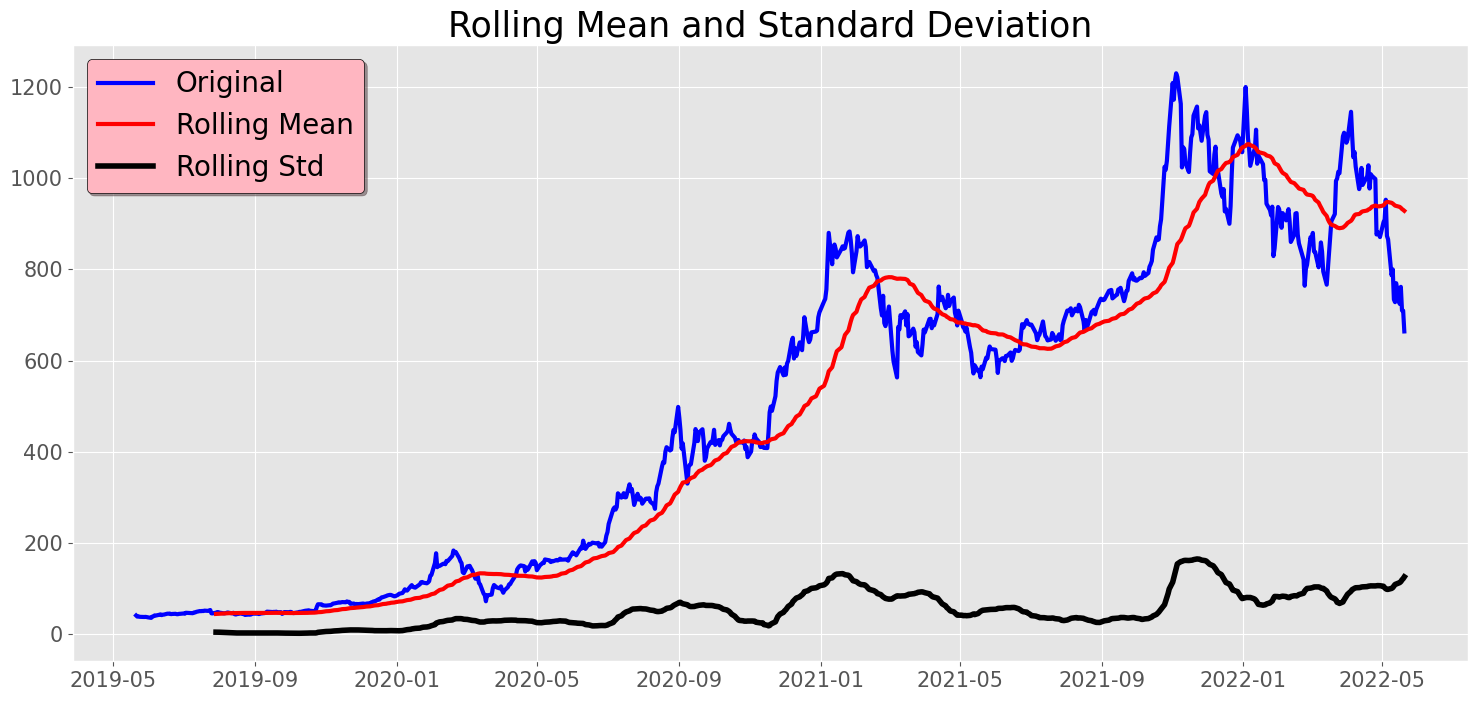

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [46]:
test_stationarity(stock_data.Close)

<Axes: >

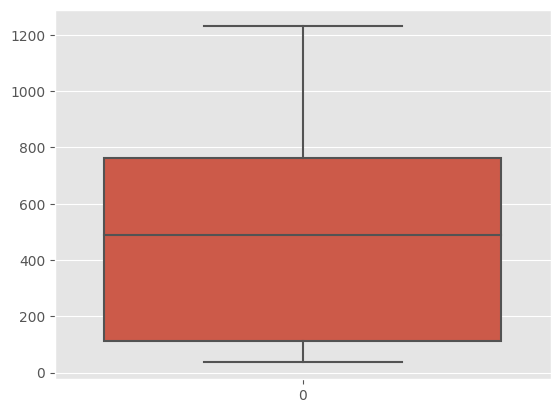

In [47]:
import seaborn as sns
sns.boxplot(stock_data.Close)

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[['Close']], period=12)

In [49]:
result

In [50]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

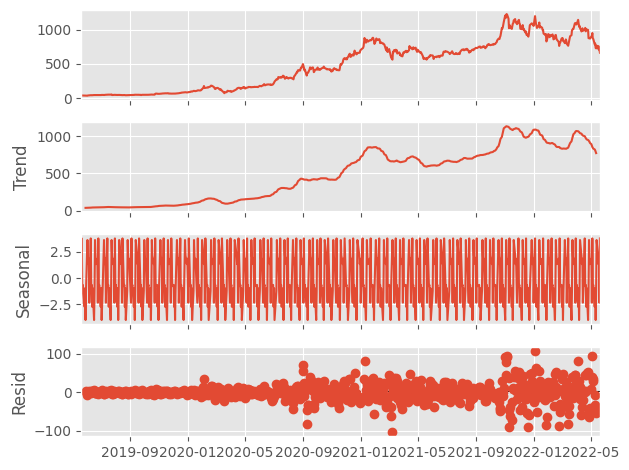

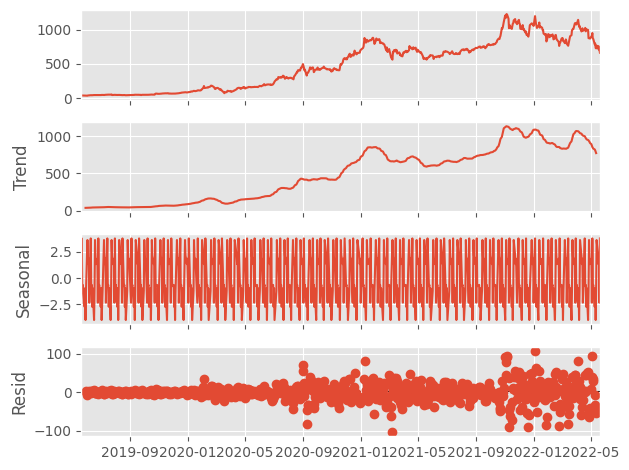

In [64]:
result.plot()

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

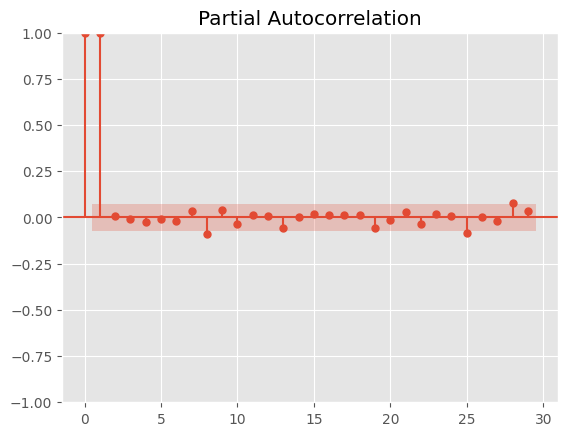

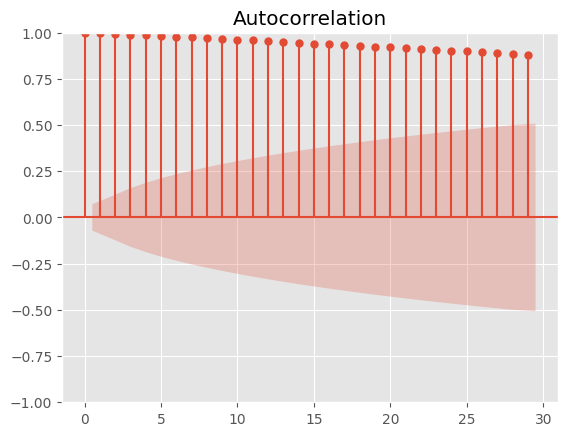

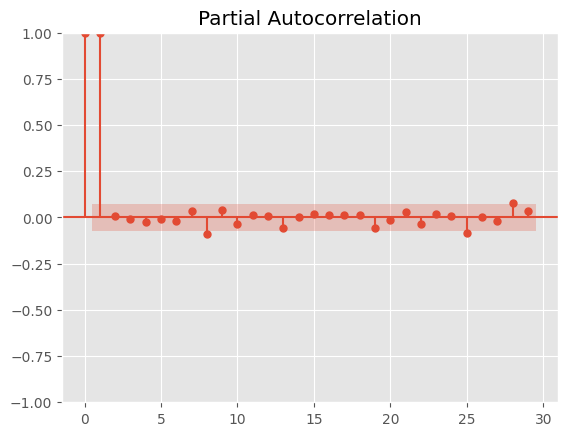

In [68]:
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

In [70]:
## Convertin non-statinoary data to statinoary
df_close=stock_data['Close']

In [74]:
df_close=df_close.diff(3)

In [76]:
df_close=df_close.dropna()

<Axes: xlabel='Date'>

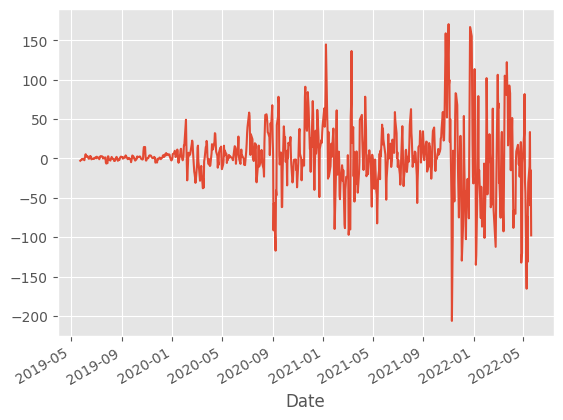

In [77]:
df_close.plot()

In [87]:
df_close.shape

(755,)

In [90]:
test_data=df_close[:-60]

In [92]:
train_data=df_close[-60:]

In [97]:
plt.figure(figsize=(18, 8))
plt.grid(True)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Prices', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data, 'green', label='Train data', linewidth=5)
plt.plot(test_data, 'blue', label='Test_data', linewidth=5)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
plt.show()